### Importamos librerias

In [59]:
import collections
import random
import simpy
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

### Metodos para realizar la simulacion

In [60]:
def ventaBoletos(env, num_boletos, pelicula, teatro):
  with teatro.contador.request() as turno:
    resultado = yield turno | teatro.sold_out[pelicula]
    if turno not in resultado:
      teatro.num_renegados[pelicula] += 1
      return
    if teatro.num_boletos[pelicula] < num_boletos:
      yield env.timeout(0.5) 
      return
    teatro.num_boletos[pelicula] -= num_boletos
    if teatro.num_boletos[pelicula] < 2:
      teatro.sold_out[pelicula].succeed()
      teatro.tiempo_agotado[pelicula] = env.now
      teatro.num_boletos[pelicula] = 0
    yield env.timeout(1)


def llegadaClientes(env, teatro):
  while True:
    yield env.timeout(random.expovariate(1/0.5))
    pelicula = random.choices(teatro.peliculas, teatro.probabilidad, k=1)
    num_boletos = random.randint(1, 6)
    if teatro.num_boletos[pelicula[0]]:
      env.process(ventaBoletos(env, num_boletos, pelicula[0], teatro))

def process_run(vel,nboleto,tsimulacion):   
    
    VELOCIDAD_LLEGADA = vel
    NUM_BOLETO = nboleto
    TIEMPO_SIMULACION = tsimulacion
    
    resultado = ""
    
    Teatro = collections.namedtuple('Teatro', 'contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados')

    print('Cinema DON BOSQUITO')
    env = simpy.Environment()

    contador = simpy.Resource(env,capacity=1)
    peliculas = ['AVENGERS', 'Rapidos y Furiosos', 'El Dia Despues de Manania']
    probabilidad=[0.1, 0.3, 0.6]
    num_boletos = {pelicula: NUM_BOLETO for pelicula in peliculas}
    sold_out = {pelicula: env.event() for pelicula in peliculas}
    tiempo_agotado = {pelicula: None for pelicula in peliculas}
    num_renegados = {pelicula: 0 for pelicula in peliculas}

    teatro = Teatro(contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados)
    env.process(llegadaClientes(env, teatro))
    env.run(until=TIEMPO_SIMULACION)

    # Analisis y resultados
    for pelicula in peliculas:
      if teatro.sold_out[pelicula]:
        sms1 = 'La Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula])
        sms2 = 'El numero de personas que salieron de la fila son /renegados %s' %teatro.num_renegados[pelicula]
        resultado = resultado + "\n" + sms1 +"\n"+ sms2
    return resultado

### Metodo para ejecutar mediante el boton

In [61]:
def ejecutar():
    vel = txvelocidad.get()
    nbol=txnboleto.get()
    sim=txsimulacion.get()
    
    res = process_run(vel=int(vel),nboleto=int(nbol),tsimulacion=int(sim))
    #print("resp ",res)
    resultado.insert(tk.END, "\n"+res)

### Ventana en TKINTER

In [63]:
ventana = Tk()
ventana.geometry("600x600")
ventana.title("Simulacion Boleteria")
ventana.resizable(0,0)

txvelocidad=StringVar()
velocidad = Label(ventana,text="Velocidad:", width=10).place(x=180, y=10)
txtvelocidad = ttk.Entry(ventana, textvariable=txvelocidad).place(x=250,y=10)

txnboleto=StringVar()
nboleto = Label(ventana,text="Numero de boletos:", width=20).place(x=120, y=40)
txtnboleto = ttk.Entry(ventana, textvariable=txnboleto).place(x=250,y=40)

txsimulacion=StringVar()
simulacion = Label(ventana,text="Tiempo de la simulacion:", width=20).place(x=107, y=70)
txtsimulacion = ttk.Entry(ventana,textvariable=txsimulacion).place(x=250,y=70)

resultado = Text(ventana)
resultado.place(x = 10, y=180, width=580, height=380)
    
Button(ventana, text="          Ejecutar          ", command=ejecutar).place(x=250, y=120)

ventana.mainloop()

Cinema DON BOSQUITO


### Interfaz Grafica

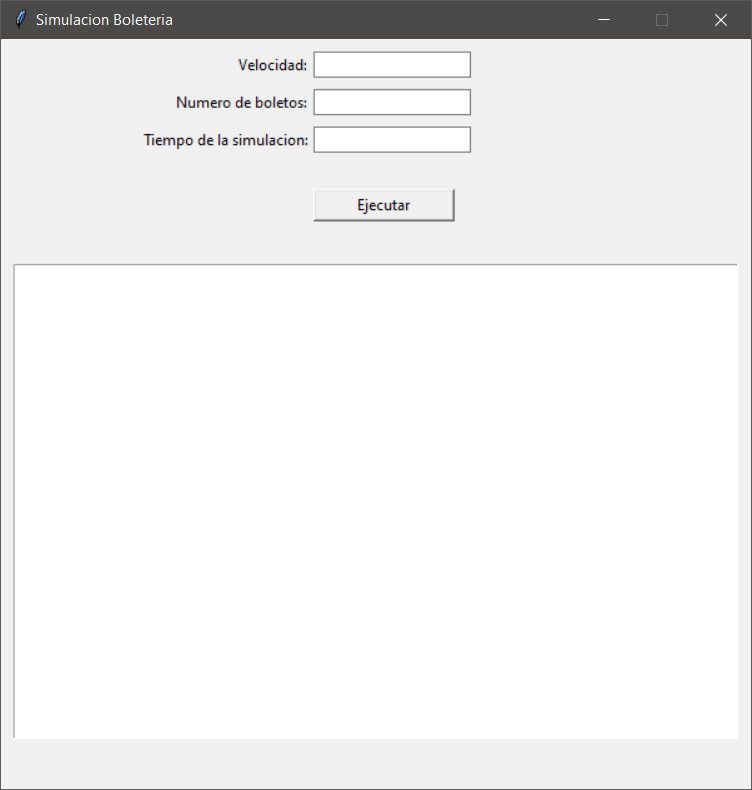

### Resultados de la simulacion

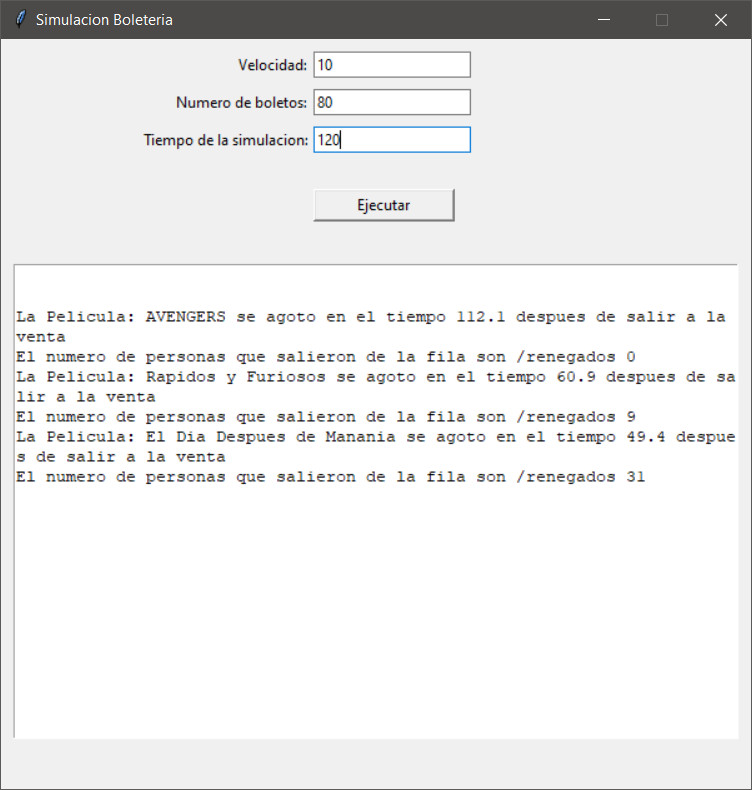